In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

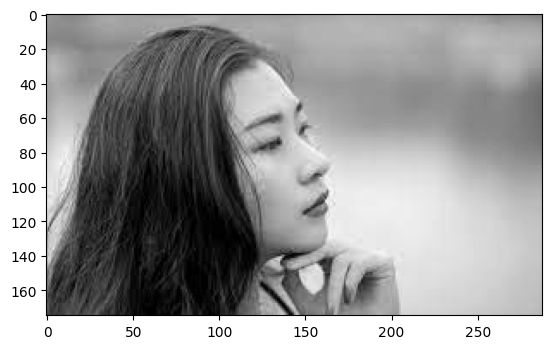

In [2]:
img = cv.imread('portrait_lady.png',cv.IMREAD_GRAYSCALE)
#plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.imshow(img,cmap='gray')
#plt.xticks([]),plt.yticks([])
#plt.show()

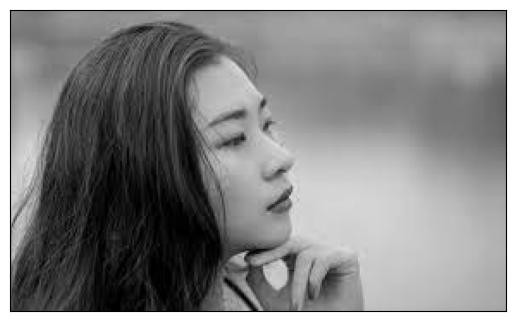

In [3]:
img_rgb = cv.cvtColor(img,cv.COLOR_GRAY2RGB)
plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

Although this looks exactly/ pretty similar to what we have see above in the pic before this one, the later one is RGB sequence whereas the former one is in GRAY scale.

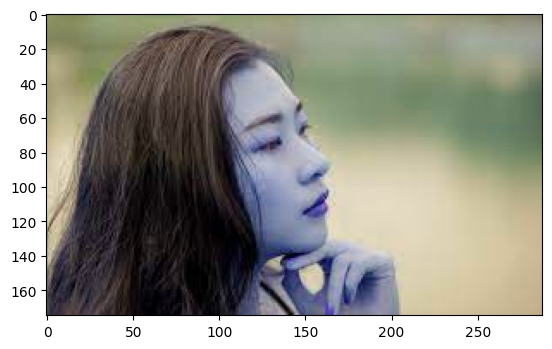

In [4]:
img_color = cv.imread('portrait_lady.png',cv.IMREAD_COLOR)
plt.imshow(img_color)
#plt.xticks([]),plt.yticks([])
#plt.show()
## RGB format image

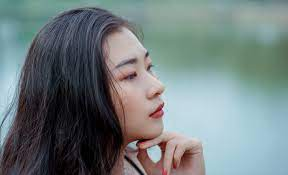

In [5]:
cv2_imshow(img_color)

The Reason we get to see 2 different kinds of image when applying CV V/S plt is becasue
1.   plt uses RGB format.
2.   cv.imshow() uses BGR format.


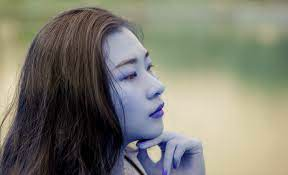

In [6]:
## Now while working with Open CV and matplotlib
## we have to conert the image from bgr to rgb for using matplotlib
img_color_rgb = cv.cvtColor(img_color,cv.COLOR_BGR2RGB)
cv2_imshow(img_color_rgb)

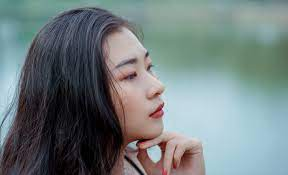

In [7]:
colored_image = cv2_imshow(img_color)

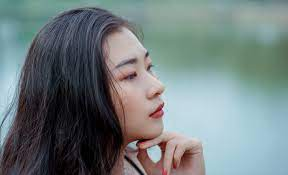

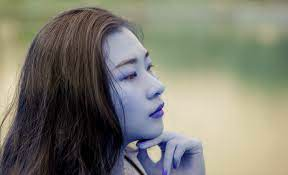

Pixel value in BGR format: [142 149  98]
Pixel value in RGB format: [ 98 149 142]


In [8]:
# Load the image (assuming OpenCV default is BGR)
img_bgr = cv.imread('portrait_lady.png')

# Convert the image to RGB
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Display both images (BGR and RGB)
cv2_imshow(img_bgr)  # Should display with color shift if it's really BGR
cv2_imshow(img_rgb)  # Should display correctly with no color shift

# Compare pixel values to infer the color space
pixel_bgr = img_bgr[0, 0]  # Get top-left pixel in BGR image
pixel_rgb = img_rgb[0, 0]  # Get top-left pixel in RGB image

print(f"Pixel value in BGR format: {pixel_bgr}")
print(f"Pixel value in RGB format: {pixel_rgb}")

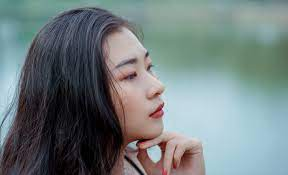

In [9]:
img_color = cv.imread('portrait_lady.png')  # Load the image

if img_color is None:
    print("Error loading image")
else:
    # Show the image
    cv2_imshow(img_color)

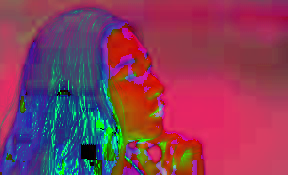

In [10]:
hsv_img = cv.cvtColor(img_color,cv.COLOR_BGR2HSV)
cv2_imshow(hsv_img)

In [11]:
## to have a look at the pixel level understanding of hsv space and how the different channels work
print(hsv_img.shape)

(175, 288, 3)


Now in order to have some better quality at individual pixel level

Histogram Equivalisation

As we can see in the output above the image is of better quality and contrast after the histogram equivalisation

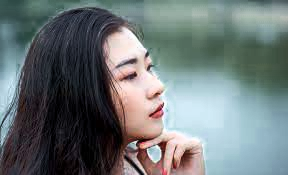

In [12]:
# Equivalise the Histogram
new_val = cv.equalizeHist(img_color[...,2])

## entering the equivalised value for Value channel of HSV space to the hsv_img
hsv_img[:,:,2] = new_val

## converting back to BGR color space
img_eq = cv.cvtColor(hsv_img,cv.COLOR_HSV2BGR)

#final outcome after Histogram equivalisation
cv2_imshow(img_eq)

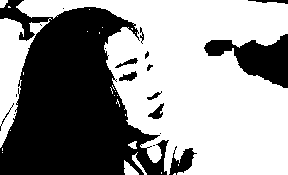

127.0


In [13]:
#Binary Thresholding - Converting to binary scale image where only background and foreground is diff between 1 & 0
bin_img = cv.imread('portrait_lady.png',cv.IMREAD_GRAYSCALE)

# cv.threshold(src, thresh, maxval, type) -> retval, dst
ret,bin_img_thresh = cv.threshold(bin_img,127,255,cv.THRESH_BINARY)
## what happens here is that any pixel value under 127 will be classified as 0(black) and anything more than 127 as 1 (white)
cv2_imshow(bin_img_thresh)
print(ret)

#Here as we can see that the optimum threshold value has also been returned as 127.0

Lets try with 100 as pixel threshold value

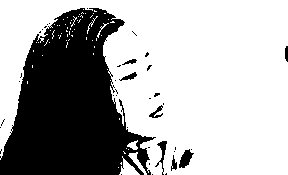

100.0


In [14]:
bin_img_hundred = cv.imread('portrait_lady.png',cv.IMREAD_GRAYSCALE)
ret,bin_img_thresh_hundred = cv.threshold(bin_img_hundred,100,255,cv.THRESH_BINARY)
cv2_imshow(bin_img_thresh_hundred)
print(ret)

So quite evidently as we can see that, as we keep cranking up the threshold pixel values up as high as possible, more and more pixels keep getting marked as 0 (as lesser number of pixels have that high value)

In here the the Threshold pixel value for differentiation has been chosen by Otsu Thresholding algorithm as:  102.0


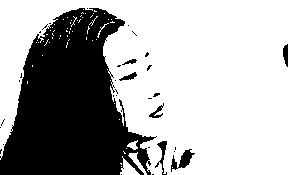

In [15]:
# Otsu Thresholding
## In this image segmentation and thresholding method the threshold pixel value has
bin_img = cv.imread('portrait_lady.png',cv.IMREAD_GRAYSCALE)
ret_2, thresh_img = cv.threshold(bin_img, 0, 255,cv.THRESH_BINARY + cv.THRESH_OTSU)
print("In here the the Threshold pixel value for differentiation has been chosen by Otsu Thresholding algorithm as: ",ret_2)
cv2_imshow(thresh_img)

So as we can see that the Otsu Thresholding Technique does a better job in finding that particular pixel value for differentiating the image from the background and foreground.

102.0


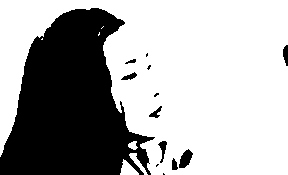

In [16]:
## Now in order to take this 1 step further we will be using Gaussian filter bfore applying Otsu Thresholding technique
## in order to smoothen out the image before applying anything else
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret3)
cv2_imshow(th3)

### Experimenting with the size of the Gaussian filter

102.0


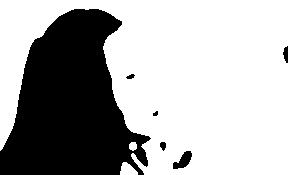

102.0


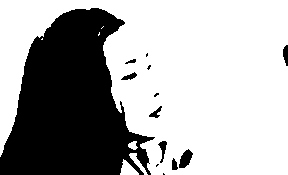

102.0


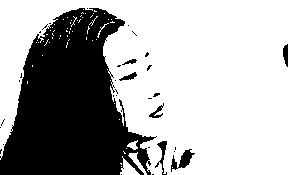

In [17]:
# Gaussian filter with 15X15 filter
blurred = cv.GaussianBlur(img, (15, 15), 0)
ret4,th4 = cv.threshold(blurred,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret4)
cv2_imshow(th4)

# Gaussian filter with 5X5 filter
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret3)
cv2_imshow(th3)

# Gaussian Filter with 3X3 filter
blurred = cv.GaussianBlur(img, (1, 1), 0)
ret5,th5 = cv.threshold(blurred,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret5)
cv2_imshow(th5)

We can clearly see that with the decrease in size of the Gaussian filter the sharpness of the Image increases gradually.

```
# This is formatted as code
```



## Now Based on certain specific colors we are going to Threshold specific colors

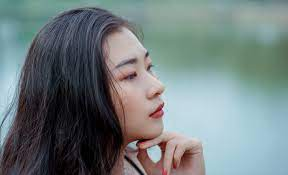

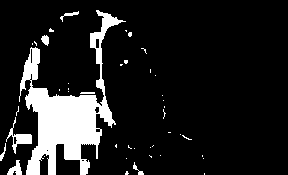

In [18]:
img = cv.imread('portrait_lady.png', cv.IMREAD_COLOR)
cv2_imshow(img)

result = img.copy()

image = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Use tools like GIMP or Image Picker to find the range
# https://imagecolorpicker.com/color-code/8a4c8c
lower = np.array([115,0,0])
upper = np.array([155,255,255])

mask = cv.inRange(image, lower, upper)
cv2_imshow(mask)

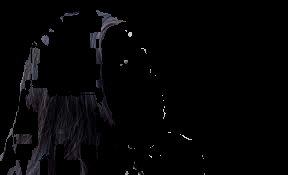

In [19]:
result = cv.bitwise_and(result, result, mask=mask)
cv2_imshow(result)

Image Smoothing using various techniques like Mean, Median and Gaussian Blurring

The main purpose of Smoothing is to remove unwanted unnecessary noise from the Image under processing.



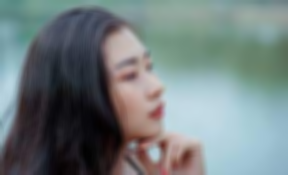

In [20]:
img = cv.imread('portrait_lady.png', cv.IMREAD_COLOR)

# Define
kernel = np.ones((7,7),np.float32)/49
dst = cv.filter2D(img,-1,kernel)
cv2_imshow(dst)

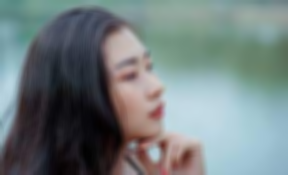

Average Blurring Smoothing Technique


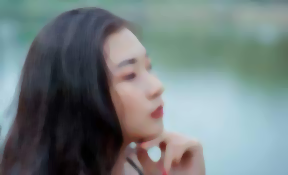

Median Blurring Smoothing Technique


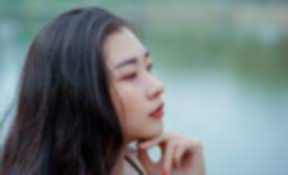

Gaussian Blurring Smoothing Technique


In [21]:
# average filter
blur = cv.blur(img,(7, 7))
cv2_imshow(blur)
print("Average Blurring Smoothing Technique")

# Median filter
median = cv.medianBlur(img, 7)
cv2_imshow(median)
print("Median Blurring Smoothing Technique")

# Gaussian filter
gaussian = cv.GaussianBlur(img, (7, 7), 0)
cv2_imshow(gaussian)
print("Gaussian Blurring Smoothing Technique")


Now we will be Trying out the different Morphological Operations namely:-


1.   Erosion (Used for removing unwanted noise from the boundary of the image)
2.   Dilation (used to widen the borden the foregorund of the image, applied for joining broken parts of images)
3. Opening (Erosion + Dilation)
4. Closing (Dilation + Erosion)



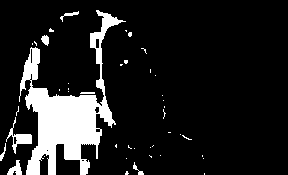

In [22]:
img = cv.imread('portrait_lady.png', cv.IMREAD_COLOR)

result = img.copy()

image = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Use tools like GIMP or Image Picker to find the range
# https://imagecolorpicker.com/color-code/8a4c8c
lower = np.array([115,0,0])
upper = np.array([155,255,255])

mask = cv.inRange(image, lower, upper)
cv2_imshow(mask)

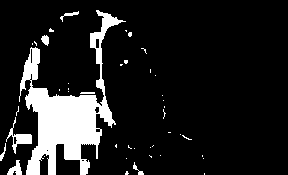

In [23]:
cv2_imshow(mask)

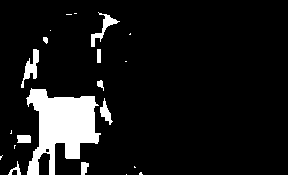

In [24]:
# Erosion
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(mask, kernel,iterations = 1)
cv2_imshow(erosion)

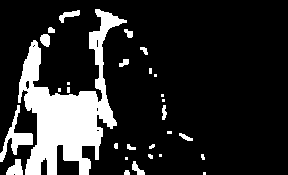

In [25]:
#Dilation
dilation = cv.dilate(mask, kernel,iterations = 1)
cv2_imshow(dilation)

Feature Extraction - Edge Detectors (Where different partsa and especailly the boundaries of the image are extracted)

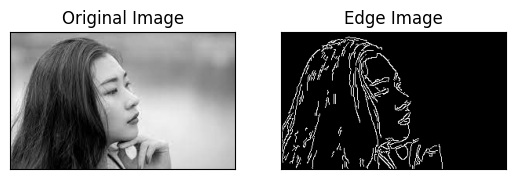

In [26]:
img = cv.imread('portrait_lady.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img, 100, 200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()